# Modul 8 Praktikum Sains Data

In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Deep Learning Model untuk klasifikasi Fashion MNIST

Fashion MNIST adalah dataset dari Keras dan Tensorflow yang berisikan gambar-gambar berupa pakaian, sebanyak
70.000 buah dan ukuran setiap gambar adalah 28x28 pixel

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import keras

In [3]:
from keras.datasets import fashion_mnist

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 3us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [6]:
print("X_train_full: ", X_train_full.shape)
print("y_train_full: ", y_train_full.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train_full:  (60000, 28, 28)
y_train_full:  (60000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [7]:
X_train_full[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [9]:
sample = 0
image = X_train_full[sample]

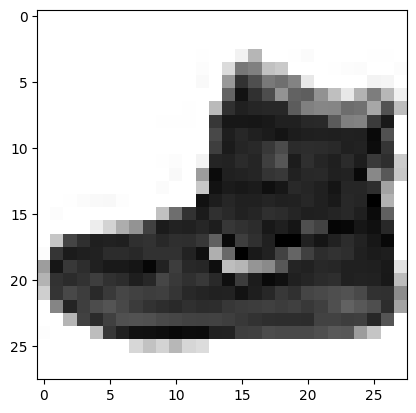

In [10]:
plt.imshow(image, cmap = 'binary')
plt.show()

In [11]:
print("kelas untuk gambar indeks ke-0: ", y_train_full[sample])

kelas untuk gambar indeks ke-0:  9


In [12]:
# Deskripsi untuk setiap kelas
class_mnist = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

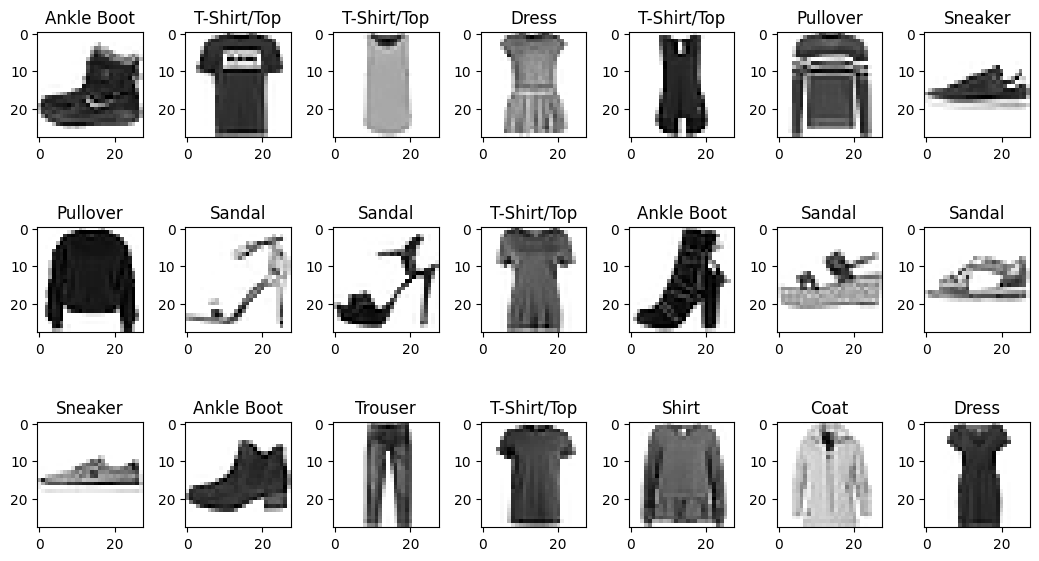

In [13]:
#menampilkan beberapa image dari fashion_mnist
num_row = 3
num_col = 7
num = num_row * num_col

images = X_train_full[:num]
labels = y_train_full[:num]

fig, axes = plt.subplots(num_row, num_col, figsize = (1.5*num_col, 2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap = 'binary')
    ax.set_title(f'{class_mnist[labels[i]]}')
plt.tight_layout()
plt.show()

## Membuat Model

Langkah-langkah dalam membangun model:

- Spesifikasi arsitekturnya
- Compile
- Fit
- Prediksi

In [14]:
#Data dibagi menjadi data train, test, dan validasi
#Data validasi diambil dari 5000 data pertama dari data train full
#Lalu diskalakan dari 0 - 1

X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [15]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_valid: ", X_valid.shape)
print("y_valid: ", y_valid.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (55000, 28, 28)
y_train:  (55000,)
X_valid:  (5000, 28, 28)
y_valid:  (5000,)
X_test:  (10000, 28, 28)
y_test:  (10000,)


In [16]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28, 28])) #mengubah input menjadi 1D array
model.add(keras.layers.Dense(300, activation = 'relu')) #hidden layer dgn 300 neuron dan activation ReLu
model.add(keras.layers.Dense(100, activation = 'relu')) #hidden layer dgn 100 neuron dan activation ReLu
model.add(keras.layers.Dense(10, activation = 'softmax')) #output layer dgn 10 neuron dan activation softmax

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

## Loss Function

Nilai akumulasi error dari seluruh data prediksi

Contoh:
- MSE (Mean Squared Error) pada masalah Regresi
- Sparse_Categorical_Entropy pada masalah klasifikasi pada 2 atau lebih label kelas

Digunakan untuk mengukur performa model

In [18]:
model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'sgd', #stocastic gradient descent
              metrics = ['accuracy'])

In [19]:
#fit the model
history = model.fit(X_train, y_train, epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6836 - loss: 0.9952 - val_accuracy: 0.8294 - val_loss: 0.5058
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8253 - loss: 0.5001 - val_accuracy: 0.8390 - val_loss: 0.4606
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8429 - loss: 0.4473 - val_accuracy: 0.8582 - val_loss: 0.4038
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8537 - loss: 0.4158 - val_accuracy: 0.8640 - val_loss: 0.3900
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.8573 - loss: 0.4013 - val_accuracy: 0.8708 - val_loss: 0.3719
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8674 - loss: 0.3779 - val_accuracy: 0.8702 - val_loss: 0.3795
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8701 - loss: 0.3676 - val_accuracy: 0.8644 - val_loss: 0.3773
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8756 - loss: 0.3541 -

# Menggunakan Model untuk Prediksi

In [20]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8310 - loss: 66.4840


[69.83614349365234, 0.8278999924659729]

In [21]:
X_new = X_test[:5]
y_proba = model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


In [22]:
y_proba #mengeluarkan peluang suatu data masuk ke kelas tertentu

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [23]:
y_p = np.array([np.argmax(i) for i in y_proba]) #mendapatkan kelas
print(y_p)
print(np.array(class_mnist)[y_p]) #deskripsi kelasnya

[9 2 1 1 6]
['Ankle Boot' 'Pullover' 'Trouser' 'Trouser' 'Shirt']


In [24]:
y_test[:5] #data yang asli

array([9, 2, 1, 1, 6], dtype=uint8)